# BUDT 758X - Final Project

#### Project Overview

Transportation spending is an important part of everyone's daily expenses, although trip modes and purposes differ among people. Whether you drive your own car, or take the metro/shuttle to school or workplace, there are always some special circumstances, such as no parking lots around the destination, long walking distance on rainy days and metro/shuttle’s unsuitable schedule. At those moments, people in NYC(most of them use public transportation, plus so few residents own or need to own a car.) will use taxi service so that they can arrive at the destination on time. Compared with private cars and public transportation, the biggest advantage of this type of service is a combination of high degree of mobility and flexibility. 
For this project, we will use the dataset of 2016 NYC taxi trips to conduct the research. We are going to figure out the answers of the following questions. NYC has 5 areas,the Bronx, Brooklyn, Manhattan, Queens, and Staten Island.

#### Questions

1.How do different factors affect the trip duration (weather, distance, and weekend or not)?

2.Do the peak hours for the weekday and the weekend distribute differently?

3.What areas have more dense pick-up spots for taxi drivers? Why?

#### Code

In [1]:
# Import the modules
import glob
import pandas as pd
import numpy as np
from math import sin, cos, sqrt, atan2, radians
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.graph_objects as go
import datetime as dt

In [2]:
# Check the current path
%pwd

'C:\\Users\\yang7'

In [3]:
# Change the path
%cd C:/Users/yang7/OneDrive/Desktop/python

C:\Users\yang7\OneDrive\Desktop\python


In [4]:
# weather dataset import
weather = pd.read_csv (r'C:/Users/yang7/OneDrive/Desktop/python/weather_data_nyc_centralpark_2016.csv')
weather.drop(["maximum temerature", "minimum temperature","precipitation","snow fall","snow depth"], axis = 1, inplace = True) 
weather.head()

date  average temperature
0  01-01-16                 39.0
1  02-01-16                 35.0
2  03-01-16                 39.5
3  04-01-16                 24.0
4  05-01-16                 19.5

In [5]:
# 2nd dataset of taxi drives in NYC from 2016 Jan to 2016 June
sample = pd.read_csv (r'C:/Users/yang7/OneDrive/Desktop/python/NYC Taxi Data Set.csv')
sample.head()

id  vendor_id   pickup_datetime  dropoff_datetime  passenger_count  \
0  id2875421          2  14-03-2016 17:24  14-03-2016 17:32                1   
1  id2377394          1  12-06-2016 00:43  12-06-2016 00:54                1   
2  id3858529          2  19-01-2016 11:35  19-01-2016 12:10                1   
3  id3504673          2  06-04-2016 19:32  06-04-2016 19:39                1   
4  id2181028          2  26-03-2016 13:30  26-03-2016 13:38                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  
0                  N            455  
1                  N            663  
2                  N           2124  
3                  N            429  
4                  N            435

In [6]:
sample.shape

(1048575, 11)

In [7]:
# Delete the space in front of the start_date column if any
sample.pickup_datetime = sample.pickup_datetime.str.lstrip()

In [8]:
# Extract a part of date as a new list for future use
# Convert all kinds of object in pickup time column to datetime with one uniform format
import datetime
taxiDate = []
for i in range(1048575):
    if sample.iat[i,2][1]=='/' and sample.iat[i,2][3]=='/' :
        taxiDate.append(datetime.datetime.strptime(sample.iat[i,0][0:8], '%m/%d/%Y').strftime('%d-%m-%y'))
    elif sample.iat[i,2][2]=='/' and sample.iat[i,2][4]=='/' :
        taxiDate.append(datetime.datetime.strptime(sample.iat[i,0][0:9], '%m/%d/%Y').strftime('%d-%m-%y'))
    elif sample.iat[i,2][2]=='/' and sample.iat[i,2][5]=='/' :
        taxiDate.append(datetime.datetime.strptime(sample.iat[i,0][0:10], '%m/%d/%Y').strftime('%d-%m-%y'))
    else:
        taxiDate.append(datetime.datetime.strptime(sample.iat[i,2][0:10], '%d-%m-%Y').strftime('%d-%m-%y'))

In [9]:
# Generate three columns of pickup hour, date and the day of that day.
sample=sample.assign(pickup = ' ')
sample=sample.assign(date = ' ') 
sample=sample.assign(day = ' ') 
for i in range(1048575):
    sample.iat[i, -3] = sample.iat[i,3][-5:-3]
    sample.iat[i, -2] = taxiDate[i]
    sample.iat[i, -1] = datetime.datetime.strptime(sample.iat[i,-2], '%d-%m-%y').strftime('%A')
sample.head()

id  vendor_id   pickup_datetime  dropoff_datetime  passenger_count  \
0  id2875421          2  14-03-2016 17:24  14-03-2016 17:32                1   
1  id2377394          1  12-06-2016 00:43  12-06-2016 00:54                1   
2  id3858529          2  19-01-2016 11:35  19-01-2016 12:10                1   
3  id3504673          2  06-04-2016 19:32  06-04-2016 19:39                1   
4  id2181028          2  26-03-2016 13:30  26-03-2016 13:38                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration pickup      date        day  
0                  N            455     17  14-03-16     Monday  
1                  N            663     00  12-06-16     Sunday  
2                  N           2124     12  19-01-16    Tuesday  
3                  N            429     19  06-04-16  Wednesday  
4                  N            435     13  26-03-16   Saturday

In [10]:
# Join two tables
data=pd.merge(weather, sample, on='date', how='right')

In [11]:
# Create a variable for weekend/weekdays
data=data.assign(weekend = 'weekdays') 
for i in range(1048575):
    if data.iat[i, -2] == 'Saturday' or data.iat[i, -2] == 'Sunday':
        data.iat[i, -1]= 'weekends'

In [12]:
# define the distance function by lans and lons
def distance(lat1,lon1,lat2,lon2):
    # approximate radius of earth in km
    R = 6373.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [13]:
# Create a new column and convert the lons and lats to floats
data=data.assign(distance_km = 0) 
data[["pickup_longitude", "pickup_latitude","dropoff_longitude","dropoff_latitude"]] = data[["pickup_longitude", "pickup_latitude","dropoff_longitude","dropoff_latitude"]].astype(float)
data.dtypes

date                    object
average temperature    float64
id                      object
vendor_id                int64
pickup_datetime         object
dropoff_datetime        object
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag      object
trip_duration            int64
pickup                  object
day                     object
weekend                 object
distance_km              int64
dtype: object

In [14]:
# Transform to distance
for i in range(1048575):
    data.iat[i, -1]=distance(data.iat[i, 8],data.iat[i, 7],data.iat[i, 10],data.iat[i, 9])

In [15]:
# Drop the useless cols.
data.drop(["store_and_fwd_flag", "vendor_id","id","dropoff_datetime"], axis = 1, inplace = True) 
data.dropna()
data.head()

date  average temperature   pickup_datetime  passenger_count  \
0  01-01-16                 39.0  01-01-2016 10:45                1   
1  01-01-16                 39.0  01-01-2016 00:09                2   
2  01-01-16                 39.0  01-01-2016 03:49                2   
3  01-01-16                 39.0  01-01-2016 15:48                6   
4  01-01-16                 39.0  01-01-2016 09:47                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -74.001610        40.740810         -73.996223         40.725903   
1        -73.984360        40.748985         -73.996284         40.716057   
2        -73.953148        40.791618         -73.968208         40.797230   
3        -74.005363        40.722340         -73.994698         40.740139   
4        -73.994072        40.751282         -73.994293         40.758526   

   trip_duration pickup     day   weekend  distance_km  
0            383     10  Friday  weekdays            1  
1            622     00  Friday  weekdays            3  
2            185     03  Friday  weekdays            1  
3            280     15  Friday  weekdays            2  
4            166     09  Friday  weekdays            0

In [16]:
# Import the 3rd dataset that has zipcode and locations
zipLocation = pd.read_csv('https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data')
# Change the column names for the join process
zipLocation.columns = ['ZIPCODE', 'LAT','LONG']

In [17]:
# Import the 4th dataset that has NYC restaurants' inspection record
# We will only use the zipcode to locate and calculate the sum of restaurants in that area
restaurants = pd.read_csv (r'C:/Users/yang7/OneDrive/Desktop/python/New_York_City_Restaurant_Inspection_Results.csv')
restaurants.head()

CAMIS                      DBA           BORO BUILDING         STREET  \
0  40511702        NOTARO RESTAURANT      MANHATTAN      635  SECOND AVENUE   
1  40511702        NOTARO RESTAURANT      MANHATTAN      635  SECOND AVENUE   
2  50046354                 VITE BAR         QUEENS     2507       BROADWAY   
3  50061389  TACK'S CHINESE TAKE OUT  STATEN ISLAND      11C    HOLDEN BLVD   
4  41516263               NO QUARTER       BROOKLYN     8015       5 AVENUE   

   ZIPCODE       PHONE CUISINE DESCRIPTION INSPECTION DATE  \
0  10016.0  2126863400             Italian      06/15/2015   
1  10016.0  2126863400             Italian      11/25/2014   
2  11106.0  3478134702             Italian      10/03/2016   
3  10314.0  7189839854             Chinese      05/17/2017   
4  11209.0  7187019180            American      03/30/2017   

                                            ACTION VIOLATION CODE  \
0  Violations were cited in the following area(s).            02B   
1  Violations were cited in the following area(s).            20F   
2  Violations were cited in the following area(s).            10F   
3  Violations were cited in the following area(s).            02G   
4  Violations were cited in the following area(s).            04M   

                               VIOLATION DESCRIPTION CRITICAL FLAG  SCORE  \
0        Hot food item not held at or above 140Âº F.      Critical   30.0   
1              Current letter grade card not posted.  Not Critical    NaN   
2  Non-food contact surface improperly constructe...  Not Critical    2.0   
3  Cold food item held above 41Âº F (smoked fish ...      Critical   46.0   
4  Live roaches present in facility's food and/or...      Critical   18.0   

  GRADE GRADE DATE RECORD DATE  \
0   NaN        NaN  08/28/2017   
1   NaN        NaN  08/28/2017   
2   NaN        NaN  08/28/2017   
3   NaN        NaN  08/28/2017   
4   NaN        NaN  08/28/2017   

                                     INSPECTION TYPE  
0              Cycle Inspection / Initial Inspection  
1  Administrative Miscellaneous / Initial Inspection  
2      Pre-permit (Operational) / Initial Inspection  
3      Pre-permit (Operational) / Initial Inspection  
4              Cycle Inspection / Initial Inspection

In [18]:
# Delete the extra records of the same restaurants
restaurants = restaurants.drop_duplicates(subset=['CAMIS'], keep='first')
restaurants = restaurants[['CAMIS','DBA','ZIPCODE']].copy()
# Drop the rows with missing value
restaurants.dropna()

CAMIS                                       DBA  ZIPCODE
0       40511702                         NOTARO RESTAURANT  10016.0
2       50046354                                  VITE BAR  11106.0
3       50061389                   TACK'S CHINESE TAKE OUT  10314.0
4       41516263                                NO QUARTER  11209.0
5       50015855                           KABAB HOUSE NYC  11355.0
6       50058069                          HENRI'S BACKYARD  11215.0
7       40807238              RICHMOND COUNTY COUNTRY CLUB  10304.0
8       41547684                              PLANET WINGS  10310.0
9       40376944                               TOMOE SUSHI  10012.0
10      40560896                           YAKITORI TAISHO  10003.0
11      41696945     GOLDEN KRUST CARIBBEAN BAKERY & GRILL  11422.0
12      41701178                      CRAB SPOT RESTAURANT  11215.0
13      41374557                             M NOODLE SHOP  11211.0
14      41688137  LOWER SUITES STOLI BAR SOUTH CLUB LOUNGE  11217.0
15      40570634                        AN BEAL BOCHT CAFE  10463.0
16      41552184                 NOM WAH TEA/DIM SUM PALOR  10013.0
17      41696159                     LUIGI'S PIZZA & PASTA  10452.0
18      50000705                      ANARKALI INDIAN FOOD  11218.0
19      41575449                          MIDNIGHT EXPRESS  10128.0
20      41690659                          NEW PANDA GARDEN  11377.0
21      50018449                       SPRING FISH VILLAGE  11355.0
22      41611667                             SERVICE BAR 7  11420.0
23      41006018                             THE FIVE SPOT  11205.0
24      50017063                                  MEZQUITE  11103.0
25      40743578                 EL RUMBERO BAR RESTAURANT  11372.0
26      50055935    TROPICAL REVIVAL RESTAURANT & CATERING  11357.0
27      41468267                                  ICHI UMI  10016.0
28      50047546                            BROOKLYN DINER  11234.0
29      50000892                      ANABLE BASIN SAILING  11101.0
30      50012840                                MR. WONTON  11421.0
...          ...                                       ...      ...
387832  50063788                              THINK COFFEE  11211.0
387949  50068333                       GO YORK BISTRO CAFE  10022.0
387970  50050113                                   LENWICH  10022.0
387995  50062733                 TOM AND JOANS WHISKEY BAR  11211.0
389001  50057323                       CROWN FRIED CHICKEN  11238.0
389722  50059536                             PRET A MANGER  10019.0
389744  50061438         SPECTRUM CATERING AND CONCESSIONS  11222.0
390143  50064595                          NATURAL BUYS LLC  11206.0
390546  50057985          HONEY BADGER IN LEFFERTS GARDENS  11225.0
390735  50061195            CAMIILLE'S JAMAICAN RESTAURANT  11225.0
390782  50060414                           JOE & THE JUICE  10017.0
390827  50065937                           Platinum Lounge  11436.0
393169  50050456                                   LENWICH  10023.0
393591  50065807                       HANA NOODLE STATION  11201.0
394228  50066003                                  GONG CHA  10017.0
394432  50067287                                PAPA JOHNS  11377.0
394771  50067190                               SU RA CHUNG  11355.0
395022  50060528                                     METTA  11205.0
395304  50050876                                 DOS TOROS  10104.0
395307  50058917           STARBUCKS COFFEE COMPANY #29897  10158.0
395731  50057504                                JOE COFFEE  10001.0
395855  50051414                              JANG BAK BBQ  11354.0
396221  50068243                                     GOLDA  11238.0
396385  50067052                           BAR PARTEA INC.  10012.0
397332  50055324                            969 NYC COFFEE  11372.0
398411  50062897                           AMPLE HILLS BBP  11201.0
399028  50064356                             ROAST KITCHEN  10019.0

In [19]:
# Calculate the num of restaurants by zip code
restaurantsZip=restaurants.groupby(by='ZIPCODE')['DBA'].describe()
# Prepare for join
restaurantsZip=restaurantsZip.reset_index()

In [20]:
# Join
restaurantsLocation=pd.merge(restaurantsZip, zipLocation, on='ZIPCODE', how='left')
# Filter the zipcode with too less resturants
restaurantsLocation=restaurantsLocation[restaurantsLocation['count']>5]
# Convert the count column data type.
restaurantsLocation['count'] = restaurantsLocation[['count']].astype(float)

#### For question 1: How do different factors affect the trip duration (weather, distance, and weekend or not)?

In [21]:
# Make a subset copy to use in this question
regression=data[['average temperature', 'distance_km', 'weekend','trip_duration','passenger_count']].copy()
regression.head()

average temperature  distance_km   weekend  trip_duration  passenger_count
0                 39.0            1  weekdays            383                1
1                 39.0            3  weekdays            622                2
2                 39.0            1  weekdays            185                2
3                 39.0            2  weekdays            280                6
4                 39.0            0  weekdays            166                1

In [22]:
# Determine the independent variables
cols = ['average temperature', 'distance_km', 'weekend','passenger_count']
cat_cols = ['weekend']

In [23]:
# Set up variables for multiple linear regression model
X = pd.get_dummies(regression[cols], columns=cat_cols, prefix='', prefix_sep='', drop_first=True)
X = sm.add_constant(X)
y = np.log(regression['trip_duration'])

C:\Users\yang7\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [24]:
pd.concat([X, y], axis=1).head()

const  average temperature  distance_km  passenger_count  weekends  \
0    1.0                 39.0            1                1         0   
1    1.0                 39.0            3                2         0   
2    1.0                 39.0            1                2         0   
3    1.0                 39.0            2                6         0   
4    1.0                 39.0            0                1         0   

   trip_duration  
0       5.948035  
1       6.432940  
2       5.220356  
3       5.634790  
4       5.111988

In [25]:
# Fit linear regression model and report results
model = sm.OLS(endog=y, exog=X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                 1.218e+05
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:59:03   Log-Likelihood:            -1.0536e+06
No. Observations:             1048575   AIC:                         2.107e+06
Df Residuals:                 1048570   BIC:                         2.107e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.0928      0.002   2540.385      0.000       6.088       6.098
average temperature     0.0017   4.26e-05     40.870      0.000       0.002       0.002
distance_km             0.1017      0.000    692.267      0.000       0.101       0.102
passenger_count         0.0103      0.000     20.876      0.000       0.009       0.011
weekends               -0.1046      0.001    -73.099      0.000      -0.107      -0.102
==============================================================================
Omnibus:                  1904852.198   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     137896785520.390
Skew:                         -11.915   Prob(JB):                         0.00
Kurtosis:                    1779.413   Cond. No.                         192.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residuals')

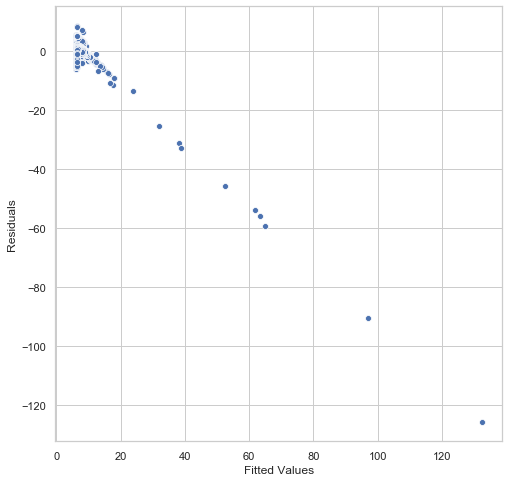

In [26]:
# Plot the residual information
plt.figure(figsize=(8,8))
sns.set(style="whitegrid")
ax = sns.scatterplot(x=results.fittedvalues,y=results.resid, marker='o', data=regression)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

As above, we tried log-level regression model. First of all, we can tell that R-sqaure is very small at 0.32, which means that only 32% of variation of trip duration can be explained by our model. Second, although the P-values of the all variables are extremly close to zero, which means the coefficents are significant, the coefficients of passenger counts and weather are pretty small. Third, the residual plots showed many outliners in the dataset. It is supposed to show a bunch of random points around 0. However, we can see over 10 points with an exteme error values. Therefore, we need to adjust the considered variables, also try to remove out liners and rerun the model.

In [27]:
# Make a copy
noOutlier=data

In [28]:
# Define a funtion to remove the outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [29]:
# Apply to the variables
noOutlier=remove_outlier(noOutlier,'average temperature')
noOutlier=remove_outlier(noOutlier,'passenger_count')
noOutlier=remove_outlier(noOutlier,'trip_duration')
noOutlier=remove_outlier(noOutlier,'distance_km')

In [30]:
noOutlier.shape

(798405, 13)

In [31]:
cols = ['distance_km', 'weekend','passenger_count']
cat_cols = ['weekend']

In [32]:
# Set up variables for multiple linear regression model
X = pd.get_dummies(noOutlier[cols], columns=cat_cols, prefix='', prefix_sep='', drop_first=True)
X = sm.add_constant(X)
y = np.log(noOutlier['trip_duration'])

In [33]:
# Fit linear regression model and report results
model = sm.OLS(endog=y, exog=X)
results2 = model.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                 1.827e+05
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:59:28   Log-Likelihood:            -6.3381e+05
No. Observations:              798405   AIC:                         1.268e+06
Df Residuals:                  798401   BIC:                         1.268e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.7455      0.002   3347.456      0.000       5.742       5.749
distance_km         0.3289      0.000    736.314      0.000       0.328       0.330
passenger_count     0.0312      0.001     27.496      0.000       0.029       0.033
weekends           -0.1338      0.001   -100.471      0.000      -0.136      -0.131
==============================================================================
Omnibus:                   278066.786   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2833956.075
Skew:                          -1.384   Prob(JB):                         0.00
Kurtosis:                      11.805   Cond. No.                         8.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residuals')

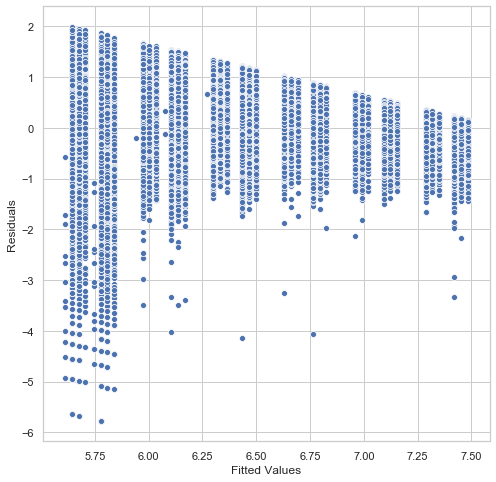

In [34]:
# Plot the residual
plt.figure(figsize=(8,8))
sns.set(style="whitegrid")
ax = sns.scatterplot(x=results2.fittedvalues,y=results2.resid, marker='o', data=noOutlier)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

In [35]:
results2.params

const              5.745510
distance_km        0.328904
passenger_count    0.031246
weekends          -0.133822
dtype: float64

In [36]:
#Confidence intervals ([0.025, 0.975])
results2.conf_int()

0         1
const            5.742146  5.748874
distance_km      0.328028  0.329779
passenger_count  0.029019  0.033473
weekends        -0.136433 -0.131212

In [37]:
#Calcualte the error bar lengths for confidence intervals.
err_series = results2.params - results2.conf_int()[0]
err_series

const              0.003364
distance_km        0.000875
passenger_count    0.002227
weekends           0.002611
dtype: float64

We can tell the errors are very small,which means the regression coefficient is measured precisely and the impact on dependent variable is different from 0.

In [38]:
coef_df = pd.DataFrame({'coef': results2.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

coef_df

coef       err          varname
0  0.328904  0.000875      distance_km
1  0.031246  0.002227  passenger_count
2 -0.133822  0.002611         weekends

[Text(0, 0, 'distance_km'),
 Text(0, 0, 'passenger_count'),
 Text(0, 0, 'weekends')]

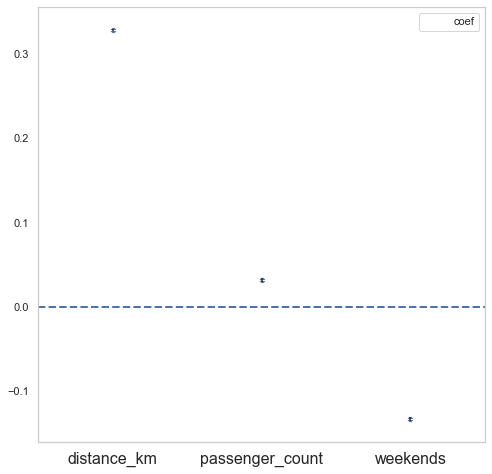

In [39]:
# Plot the coeffients with their error bar
fig, ax = plt.subplots(figsize=(8, 8))
sns.set(style="white")
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax=sns.scatterplot(x=pd.np.arange(coef_df.shape[0]),y=coef_df['coef'], marker='o', data=coef_df)
ax.set_ylabel('')
ax.set_xlabel('')
ax.axhline(y=0, linestyle='--', color='b', linewidth=2)
ax.xaxis.set_ticks_position('none')
ax.set_xticklabels(['distance_km', 'passenger_count', 'weekends'], 
                       rotation=0, fontsize=16)

After re-run the same model, we get a much better residual plot roughly within range of -6 to 2. We can tell when the expected tripduration increases, we can get a more accurate result. When the expected tripduration is under 6, there is a bigger chance that the actual duration is shorter.

Look at the statistic result, all P-values look good to make sure coefficents in the model are significantly different from 0.

When distance increase by 1 km, the trip duration will increase 32.89%.

When passengers number increases by 1, the trip duration will increase 3.12%.

When it is weekend and other variable remain the same, the trip duration will decrease 13.38% compared to weekdays.

The coefficent of average temperature is still very small, so I deleted it from the model.

Although the R-aquare is only 40.7%, I think the independent variables do have a impact on trip duration, especially the direct distance between pick-up and drop-off spots and wether it is weekend or not. We just need more information of more potential factors to make it better

#### For question 2: Do the peak hours for the weekday and the weekend distribute differently?

In [40]:
noOutlier.shape

(798405, 13)

In [41]:
noOutlier.head()

date  average temperature   pickup_datetime  passenger_count  \
0  01-01-16                 39.0  01-01-2016 10:45                1   
1  01-01-16                 39.0  01-01-2016 00:09                2   
2  01-01-16                 39.0  01-01-2016 03:49                2   
4  01-01-16                 39.0  01-01-2016 09:47                1   
5  01-01-16                 39.0  01-01-2016 03:20                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -74.001610        40.740810         -73.996223         40.725903   
1        -73.984360        40.748985         -73.996284         40.716057   
2        -73.953148        40.791618         -73.968208         40.797230   
4        -73.994072        40.751282         -73.994293         40.758526   
5        -73.996376        40.748837         -73.987129         40.697567   

   trip_duration pickup     day   weekend  distance_km  
0            383     10  Friday  weekdays            1  
1            622     00  Friday  weekdays            3  
2            185     03  Friday  weekdays            1  
4            166     09  Friday  weekdays            0  
5           1327     03  Friday  weekdays            5

In [42]:
# Convert the pickup column into a datetime
for i in range(798405):
    noOutlier.iat[i,-4]=dt.datetime.strptime(noOutlier.iat[i,-4], '%H')

In [43]:
# Sort by the pickup hour
peak=noOutlier.sort_values('pickup')

In [44]:
# Make a dateframe of every day(monday/tuesday/...) and time and there passenger count information
peak.pickup=peak.pickup.dt.strftime("%H:00")
allPeak=peak.groupby(by=['pickup','day'])['passenger_count'].describe()
allPeak=allPeak.reset_index()
allPeak=allPeak.assign(weekend = 'weekdays') 
for i in range(168):
    if allPeak.iat[i, 1] == 'Saturday' or allPeak.iat[i, 1] == 'Sunday':
        allPeak.iat[i, -1]= 'weekends'

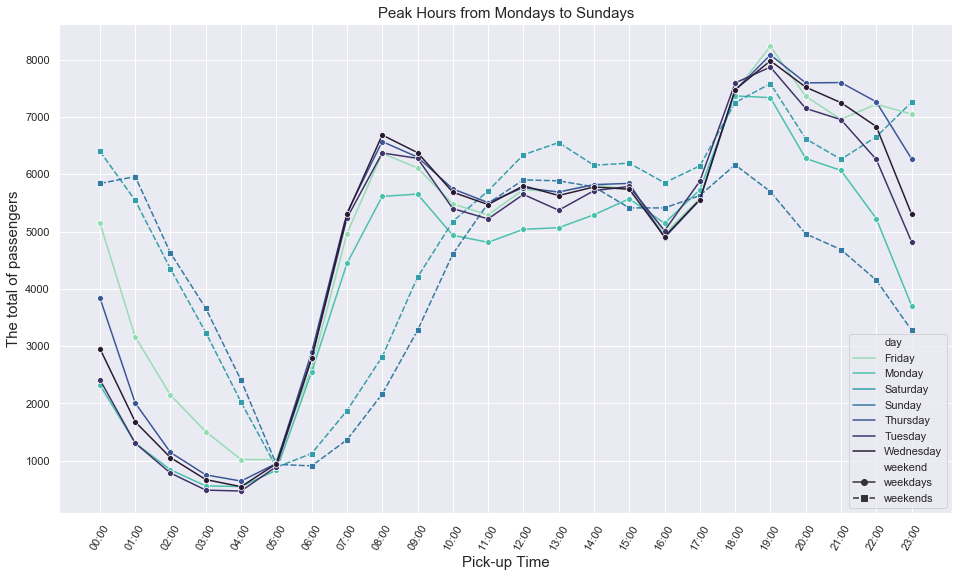

In [45]:
plt.figure(figsize = (16,9)) 
sns.set(style="darkgrid")
palette = sns.color_palette("mako_r", 7)
# Plot the overall peak hours changes in a graph
# Use different ways to show weekdays or weekends
# Use different color to show different days
overall=sns.lineplot(x='pickup', y="count",
             hue='day',style='weekend',
                     palette = palette,markers = ["o", "s"],
             data=allPeak)
for item in overall.get_xticklabels():
    item.set_rotation(60)
plt.title("Peak Hours from Mondays to Sundays", fontsize = 15)
plt.xlabel("Pick-up Time", fontsize = 15)
plt.ylabel("The total of passengers", fontsize = 15)
plt.show()

From the Plots we can tell that from Mondays to Thursdays the numbers of passengers are follow the same patten/trend.

Friday nights around 11pm the passengers remain the same level instead of decrease like weekdays.

The demand of taxis at midnight goes up since Thursday night and then gets much bigger on weekends.

No matter for which day, the lowest demand is around 4am and the highest demand is around 7pm. However, for weekdays the second biggest peak os around 8 am, when is a reasonable time for going to work. For weekends, there are other two small peaks. One is around 1am, when people hang out, and the other is 1pm, probably implies the trips for lunch.   

Saturdays and Sundays have very similar trends overall except the night. They both have a higher demand from 12am to 4am than weekdays.

#### For question 3: What areas have more dense pick-up spots for taxi drivers? Why?

In [46]:
# Your mapbox token
mapbox_access_token = 'pk.eyJ1Ijoid2FueXVuLXlhbmciLCJhIjoiY2syb3E4cTU5MTZhbDNtbzNyejRxZDAzbSJ9.V9aZq1zuZ7bovxHrjfce6g'

In [47]:
# Add a dummy variable to the DataFrame called "sample" that tags every 20th row to be included in the sample
# 10% of total data size
mapSample=noOutlier.assign(sample = 0) 

In [48]:
mapSample.shape

(798405, 14)

In [49]:
# Assign random numbers
np.random.seed( 30 )
mapSample['random number'] = np.random.randint(0,1000,size=(len(mapSample),1))

In [50]:
mapSample=mapSample.sort_values('random number')

In [51]:
# Random sampling
for i in range(0,len(mapSample)):
    if i % 20 == 0:
        mapSample.iat[i, -2] = 1

In [52]:
mapSample

date  average temperature   pickup_datetime  passenger_count  \
498668   28-03-16                 49.5  28-03-2016 10:25                1   
945001   12-06-16                 72.0  12-06-2016 04:34                3   
394948   10-03-16                 59.5  10-03-2016 15:00                2   
811834   19-05-16                 60.0  19-05-2016 22:11                1   
988568   20-06-16                 71.0  20-06-2016 13:19                1   
626106   17-04-16                 53.5  17-04-2016 23:18                1   
301677   24-02-16                 48.0  24-02-2016 21:18                1   
163451   31-01-16                 42.5  31-01-2016 22:08                1   
900102   04-06-16                 72.5  04-06-2016 22:16                1   
942816   11-06-16                 61.5  11-06-2016 08:59                1   
700725   30-04-16                 53.5  30-04-2016 20:17                1   
811781   19-05-16                 60.0  19-05-2016 08:31                1   
256903   16-02-16                 43.5  16-02-2016 13:19                1   
360763   04-03-16                 33.0  04-03-2016 16:31                1   
206400   08-02-16                 32.0  08-02-2016 18:06                1   
414093   13-03-16                 53.0  13-03-2016 00:27                1   
707662   02-05-16                 50.5  02-05-2016 11:04                1   
893149   03-06-16                 64.0  03-06-2016 22:28                3   
487448   26-03-16                 42.5  26-03-2016 13:02                2   
411555   13-03-16                 53.0  13-03-2016 18:21                1   
294664   23-02-16                 36.5  23-02-2016 13:58                1   
591598   12-04-16                 49.0  12-04-2016 20:53                1   
913516   06-06-16                 74.5  06-06-2016 20:43                1   
612395   15-04-16                 48.5  15-04-2016 08:35                1   
883633   01-06-16                 70.5  01-06-2016 12:51                1   
693664   29-04-16                 49.0  29-04-2016 19:08                1   
954001   13-06-16                 66.5  13-06-2016 22:16                1   
181364   04-02-16                 48.0  04-02-2016 23:33                2   
148135   29-01-16                 37.0  29-01-2016 11:00                1   
317679   26-02-16                 32.5  26-02-2016 13:16                1   
...           ...                  ...               ...              ...   
1027372  27-06-16                 74.0  27-06-2016 05:32                1   
307723   25-02-16                 50.0  25-02-2016 23:30                2   
193917   06-02-16                 27.5  06-02-2016 14:08                1   
44744    09-01-16                 42.0  09-01-2016 02:17                1   
108672   20-01-16                 32.5  20-01-2016 09:41                1   
879844   31-05-16                 75.0  31-05-2016 18:42                1   
192897   05-02-16                 32.0  05-02-2016 21:07                1   
557353   06-04-16                 36.0  06-04-2016 08:36                1   
996335   21-06-16                 78.5  21-06-2016 09:01                1   
965526   15-06-16                 71.5  15-06-2016 05:19                1   
71817    14-01-16                 29.0  14-01-2016 15:44                2   
618499   16-04-16                 53.5  16-04-2016 11:48                1   
14234    03-01-16                 39.5  03-01-2016 21:22                3   
285483   21-02-16                 47.0  21-02-2016 13:42                3   
1006589  23-06-16                 70.0  23-06-2016 09:21                1   
557465   07-04-16                 51.5  07-04-2016 08:56                1   
415542   13-03-16                 53.0  13-03-2016 01:08                1   
993387   21-06-16                 78.5  21-06-2016 23:31                1   
432556   16-03-16                 50.0  16-03-2016 10:01                1   
809991   19-05-16                 60.0  19-05-2016 18:05                1   
236573   

In [53]:
mapSample=mapSample[mapSample['sample']==1]

In [54]:
mapSample['pickup_longitude'].describe()
# the mean longitude of the sample is - -73.979750, which will be used as zoom center later.

count    39921.000000
mean       -73.979689
std          0.021787
min        -74.449074
25%        -73.991974
50%        -73.982086
75%        -73.969620
max        -73.631432
Name: pickup_longitude, dtype: float64

In [55]:
mapSample['pickup_latitude'].describe()
# the mean latitude of the sample is  40.753085, which will be used as zoom center later.

count    39921.000000
mean        40.753251
std          0.023457
min         40.496201
25%         40.739223
50%         40.754421
75%         40.767834
max         40.899853
Name: pickup_latitude, dtype: float64

In [56]:
mapSample.shape

(39921, 15)

In [57]:
taxi_map_data = go.Scattermapbox(
        lon = mapSample ['pickup_longitude'],
        lat = mapSample ['pickup_latitude'],
        mode = 'markers',
        marker = dict(
                    color = 'lightskyblue',
                    symbol = 'circle',
                    opacity = .5
                ),
    name = "Taxi pickup locations"
)
taxi_map_data2 = go.Scattermapbox(
        lon = restaurantsLocation['LONG'],
        lat = restaurantsLocation['LAT'],
        mode = 'markers',
        text = restaurantsLocation['count'],
        hoverinfo='text',
        marker = dict(
                    color = 'pink',
                    size = restaurantsLocation['count']/30,
                    symbol = 'circle',
                    opacity = .9,
                
                ),
        name = "Restaurant density by zipcode "
)

taxi_map_layout = go.Layout(
        title = 'Taxi Pickup Locations & Restaurants Density in NYC (Size: The number of restaurants)',
        mapbox=go.layout.Mapbox(
            accesstoken=mapbox_access_token,
            zoom=1
        )
    )

taxi_map = go.Figure(data=[taxi_map_data,taxi_map_data2], layout=taxi_map_layout)
taxi_map.update_layout(
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=40.753085,
            lon= -73.979750
        ),
        pitch=0,
        zoom=10
    )
)
taxi_map.show()

For the pickup locations, we have to use random sampling to decrease the dataset we got to 5%, since the sample size was too big to run the mapplot feature here. After sampling, the sample size bacame 79841. The red points in Manhattan area are densest. Also, the Brooklyn area has many spots along the river. Some points are around the LGA airport.


From the images, we can clearly tell that the southern part of Manhattan has both more restaurants, which is a likely factor that shapes the pattern of the taxis' pick up locations. Other pick up locations that are not in Manhanttan also tend to be within areas that have more resturants.

In [58]:
# Zoom in Manhattan to look at the pattern closer
# The center is the central park in NYC
taxi_map2 = go.Figure(data=[taxi_map_data,taxi_map_data2], layout=taxi_map_layout)
taxi_map2.update_layout(
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=40.778424,
            lon=-73.96175
        ),
        pitch=0,
        zoom=12
    )
)
taxi_map2.show()

Within Manhattan, the sourthern part is more packed than northern part in general. The most popular pick up spots are located in the several blocks at south of the Center Park.

# END